1. What is unsupervised learning in the context of machine learning?
 - Unsupervised learning is a type of machine learning where the model learns patterns from data without labeled outputs. The algorithm tries to group, cluster, or reduce data by exploring its structure. Clustering and dimensionality reduction are common unsupervised techniques.

2. How does K-Means clustering algorithm work?

 - K-Means partitions data into K clusters by:

 - Randomly initializing K centroids.

 - Assigning each point to the nearest centroid.

 - Updating centroids as the mean of assigned points.

 - Repeating steps 2-3 until convergence.
3. Explain the concept of a dendrogram in hierarchical clustering.
 - A dendrogram is a tree-like diagram showing how clusters are formed step-by-step in hierarchical clustering. It helps visualize the merging/splitting of clusters and determine the optimal number of clusters by cutting the tree at a desired level.
4. What is the main difference between K-Means and Hierarchical Clustering?

| Feature         | K-Means       | Hierarchical Clustering              |
| --------------- | ------------- | ------------------------------------ |
| Approach        | Partitional   | Hierarchical (bottom-up or top-down) |
| Need K upfront? | Yes           | No                                   |
| Structure       | Flat clusters | Dendrogram                           |

5. What are the advantages of DBSCAN over K-Means?
 - Can find arbitrary-shaped clusters.

 - No need to specify K in advance.

 - Handles noise and outliers better.

 - Works well on non-linear data.

6. When would you use Silhouette Score in clustering?
 - Use Silhouette Score to measure how well each point lies within its cluster. It helps evaluate cluster separation and choose the optimal number of clusters.

7. What are the limitations of Hierarchical Clustering?
 - Computationally expensive for large datasets.

 - No reallocation once a merge/split occurs.

 - Sensitive to noise and outliers.

 - May give misleading results on high-dimensional data.

8. Why is feature scaling important in clustering algorithms like K-Means?
 - Clustering uses distance-based metrics. Without feature scaling, features with larger ranges dominate others, leading to biased clusters. Techniques like StandardScaler or MinMaxScaler are used.

9. How does DBSCAN identify noise points?
 - DBSCAN classifies points as:

 - Core points: enough neighbors

 - Border points: near a core point but not dense

 - Noise points: neither core nor border (outliers)

10. Define inertia in the context of K-Means.
 - Inertia is the sum of squared distances from each point to its cluster center. Lower inertia indicates tighter clusters.

11. What is the elbow method in K-Means clustering?
 - It plots inertia vs. number of clusters (K). The “elbow point” where the curve bends indicates the optimal K, beyond which improvement is minimal.

12. Describe the concept of "density" in DBSCAN.
 - Density refers to the number of points within a specified radius (epsilon). High-density areas form clusters; low-density points are outliers.

13. Can hierarchical clustering be used on categorical data?
 - Not directly. Hierarchical clustering requires a distance metric; for categorical data, use alternatives like Gower distance or one-hot encoding.

14. What does a negative Silhouette Score indicate?
 - It indicates that the sample may be assigned to the wrong cluster, as it lies closer to a neighboring cluster than to its own.

15. Explain the term "linkage criteria" in hierarchical clustering.
 - Linkage criteria define how distances between clusters are calculated. Common methods:

 - Single linkage: min distance between points

 - Complete linkage: max distance

 - Average linkage: average distance

16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
 - K-Means assumes:

     - Clusters are spherical and equal in size

  - Densities are similar
If clusters vary in size/density, K-Means misclassifies points or merges/splits incorrectly.

17. What are the core parameters in DBSCAN, and how do they influence clustering?
 - eps: Neighborhood radius. Smaller values lead to more clusters or noise.

 - min_samples: Minimum points required to form a core point. Higher values make clusters stricter.

18. How does K-Means++ improve upon standard K-Means initialization?
 - K-Means++ chooses initial centroids that are far apart, improving convergence and avoiding poor local minima compared to random selection.

19. What is agglomerative clustering?
 - A bottom-up approach in hierarchical clustering where:

 - Each point starts as its own cluster.

 - Pairs of clusters are merged step-by-step based on distance.

 - Continues until one cluster remains or a stopping criterion is met.

20. What makes Silhouette Score a better metric than just inertia for model

| Metric       | Inertia                         | Silhouette Score                            |
| ------------ | ------------------------------- | ------------------------------------------- |
| Measures     | Compactness                     | Compactness **and** Separation              |
| Scales well? | May decrease always with more K | Helps find **optimal K** (higher is better) |
| Ideal usage  | Good for elbow method           | Better for **overall clustering quality**   |


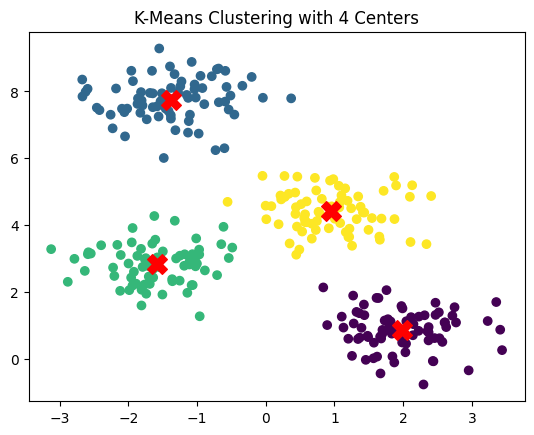

In [7]:
#Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a
#scatter plot
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
model = KMeans(n_clusters=4)
y_kmeans = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("K-Means Clustering with 4 Centers")
plt.show()


In [8]:
# Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10
#predicted labels
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

data = load_iris()
X = data.data

model = AgglomerativeClustering(n_clusters=3)
labels = model.fit_predict(X)

print("First 10 predicted labels:", labels[:10])


First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


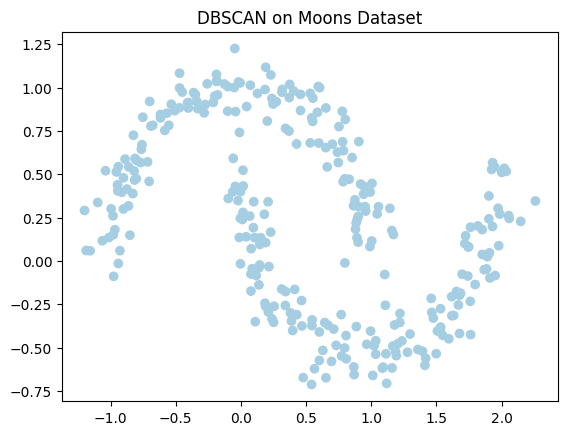

In [9]:
#Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.1, random_state=0)
model = DBSCAN(eps=0.2, min_samples=5)
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired')
plt.title("DBSCAN on Moons Dataset")
plt.show()



In [10]:
#Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each
#cluster
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

data = load_wine()
X = StandardScaler().fit_transform(data.data)

model = KMeans(n_clusters=3)
labels = model.fit_predict(X)

unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))



Cluster sizes: {np.int32(0): np.int64(51), np.int32(1): np.int64(62), np.int32(2): np.int64(65)}


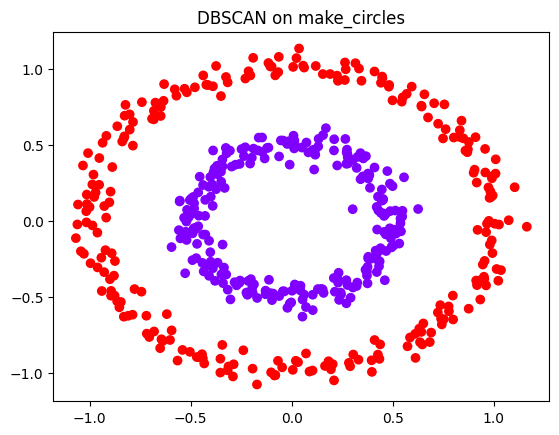

In [11]:
#Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05)
model = DBSCAN(eps=0.2, min_samples=5)
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("DBSCAN on make_circles")
plt.show()


In [12]:
#Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster
#centroids
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)

model = KMeans(n_clusters=2)
model.fit(X)

print("Cluster Centroids:\n", model.cluster_centers_)



Cluster Centroids:
 [[0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]
 [0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]]


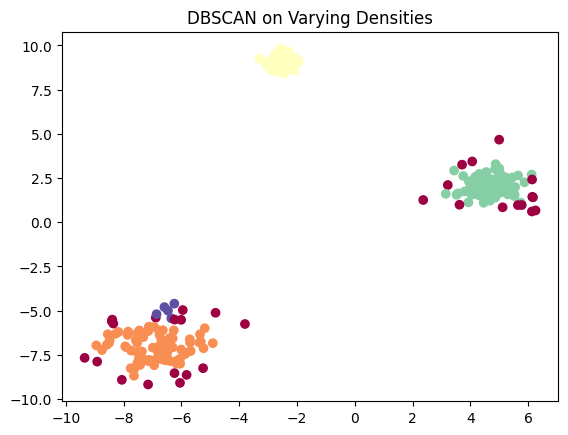

In [13]:
#Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with
#DBSCAN
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[0.3, 0.7, 1.0], random_state=42)
model = DBSCAN(eps=0.5, min_samples=5)
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral')
plt.title("DBSCAN on Varying Densities")
plt.show()


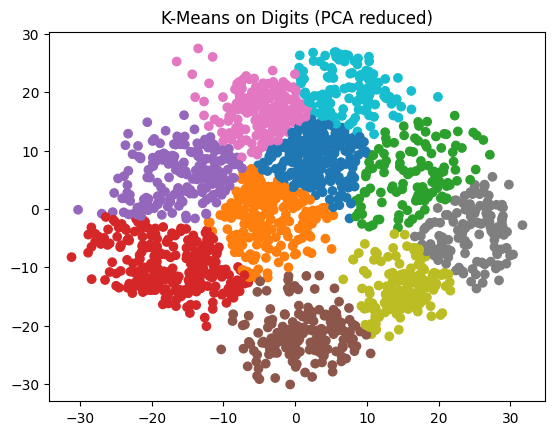

In [14]:
#Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

data = load_digits()
X = PCA(n_components=2).fit_transform(data.data)

model = KMeans(n_clusters=10, random_state=42)
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
plt.title("K-Means on Digits (PCA reduced)")
plt.show()


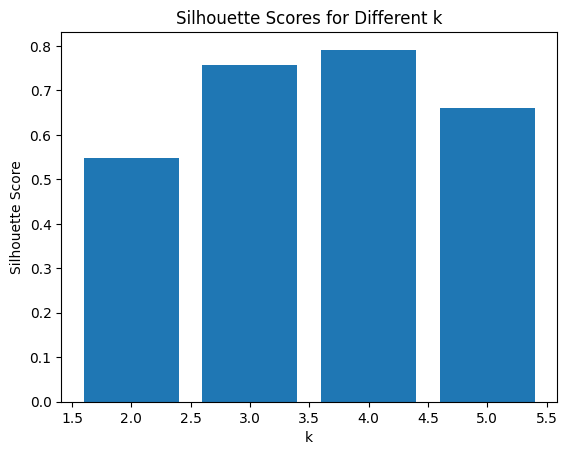

In [15]:
# Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
scores = []
ks = [2, 3, 4, 5]

for k in ks:
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(X)
    scores.append(silhouette_score(X, labels))

plt.bar(ks, scores)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different k")
plt.show()


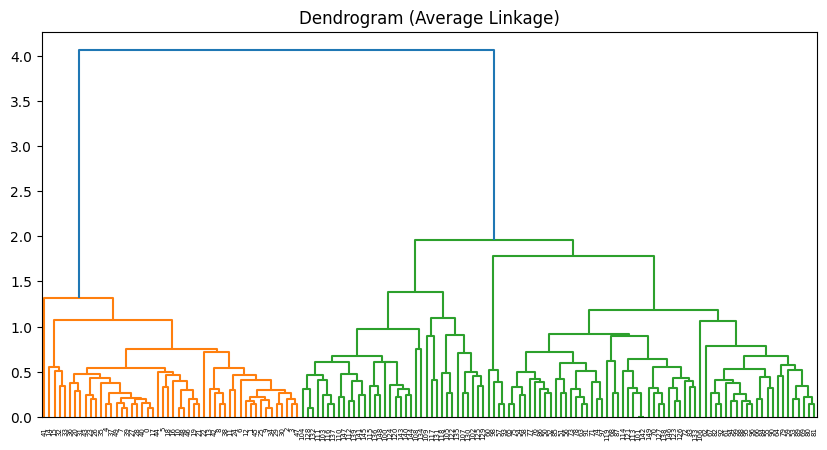

In [16]:
# Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage
from scipy.cluster.hierarchy import dendrogram, linkage

X = load_iris().data
linked = linkage(X, method='average')

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram (Average Linkage)")
plt.show()


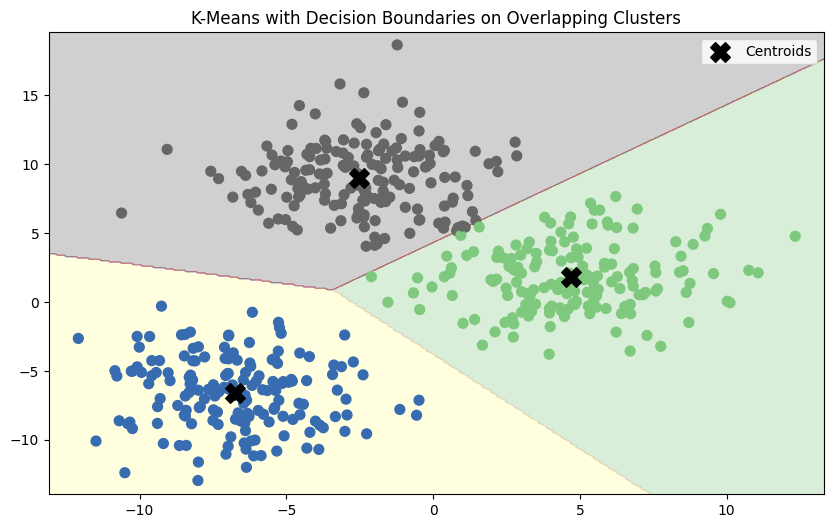

In [19]:
#Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with
#decision boundaries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic overlapping data
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=2.5, random_state=42)

# Step 2: Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Step 3: Plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 4: Visualize
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Accent')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='Accent', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', s=200, marker='X', label='Centroids')
plt.title("K-Means with Decision Boundaries on Overlapping Clusters")
plt.legend()
plt.show()



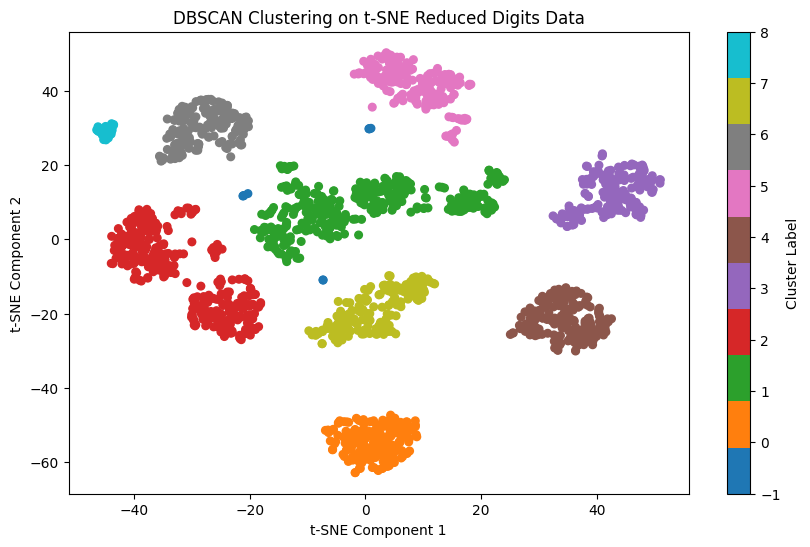

In [20]:
# Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Step 2: Reduce dimensions using t-SNE
X_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X)

# Step 3: Apply DBSCAN clustering
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Step 4: Visualize the clustering result
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=30)
plt.title("DBSCAN Clustering on t-SNE Reduced Digits Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Cluster Label")
plt.show()


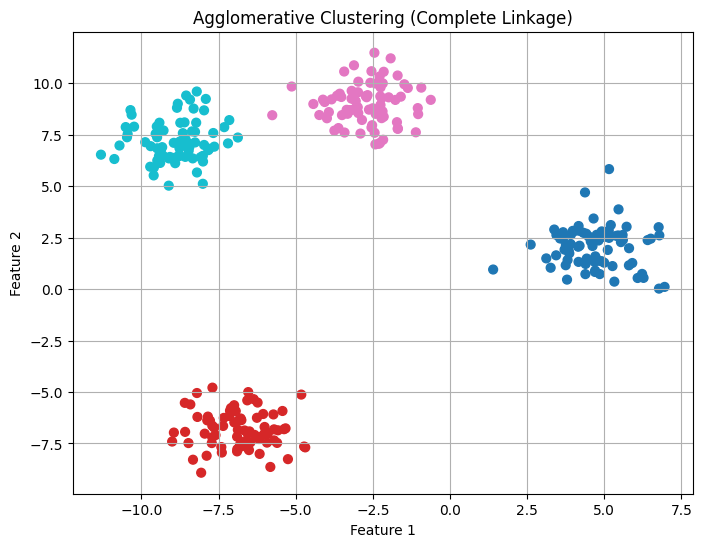

In [21]:
#Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot
#the result
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Apply Agglomerative Clustering with complete linkage
model = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = model.fit_predict(X)

# Step 3: Visualize the result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=40)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


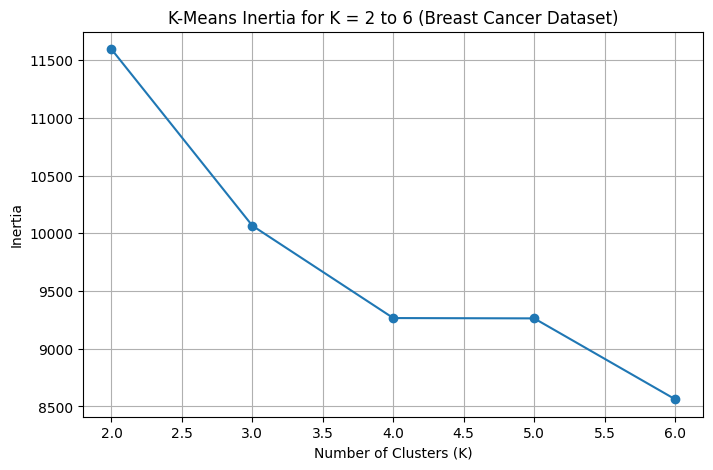

In [22]:
# Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a
#line plot
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Calculate inertia for K = 2 to 6
inertias = []
ks = range(2, 7)

for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertias.append(model.inertia_)

# Step 4: Plot inertia values
plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, marker='o', linestyle='-')
plt.title("K-Means Inertia for K = 2 to 6 (Breast Cancer Dataset)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


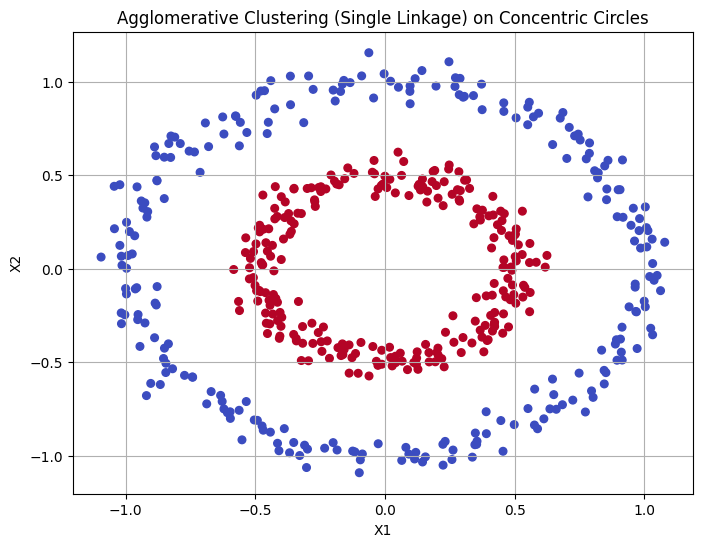

In [23]:
#Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with
#single linkage
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate concentric circles data
X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Step 2: Apply Agglomerative Clustering with single linkage
model = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = model.fit_predict(X)

# Step 3: Visualize the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', s=30)
plt.title("Agglomerative Clustering (Single Linkage) on Concentric Circles")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()



In [24]:
#Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding
#noise
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Wine dataset
data = load_wine()
X = data.data

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Number of clusters found (excluding noise):", n_clusters)
print("Number of noise points:", n_noise)


Number of clusters found (excluding noise): 0
Number of noise points: 178


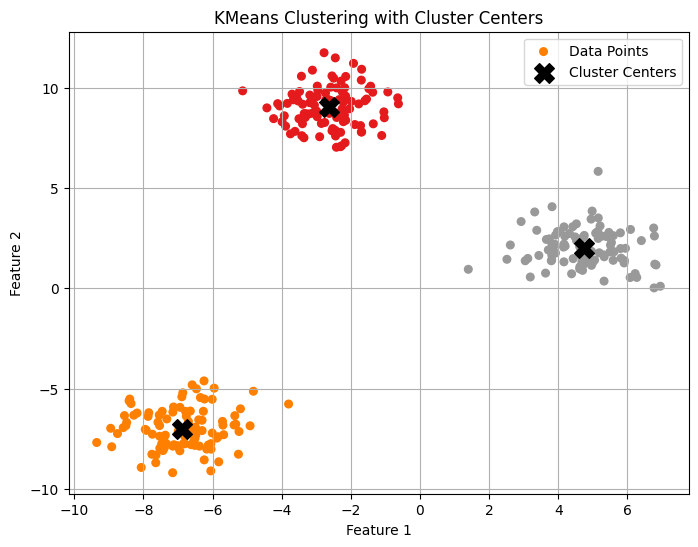

In [25]:
# Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the
#data
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Step 2: Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Step 3: Plot data points and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', s=30, label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Cluster Centers')
plt.title("KMeans Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [26]:
#Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Iris dataset
data = load_iris()
X = data.data

# Step 2: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
model = DBSCAN(eps=0.6, min_samples=5)
labels = model.fit_predict(X_scaled)

# Step 4: Count noise points (label = -1)
n_noise = list(labels).count(-1)

print("Total samples:", len(labels))
print("Number of noise samples:", n_noise)


Total samples: 150
Number of noise samples: 26


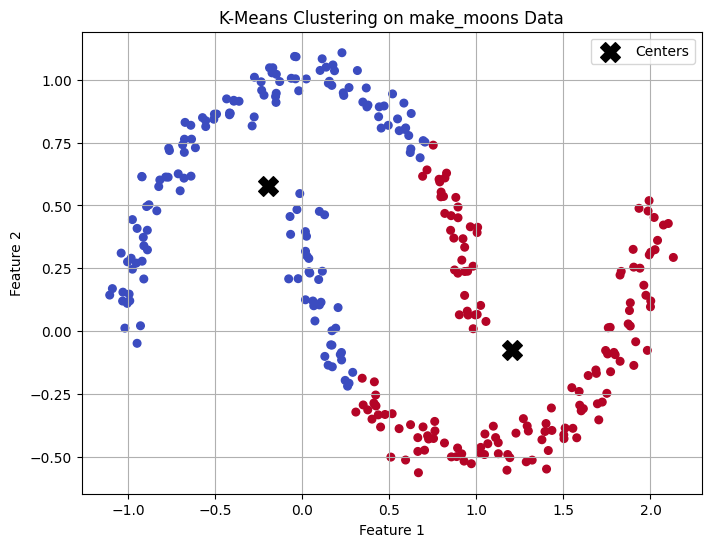

In [27]:
#Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the
#clustering result
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# Step 1: Generate non-linearly separable data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Step 2: Apply K-Means clustering
model = KMeans(n_clusters=2, random_state=42)
labels = model.fit_predict(X)

# Step 3: Visualize the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', s=30)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
            c='black', s=200, marker='X', label='Centers')
plt.title("K-Means Clustering on make_moons Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


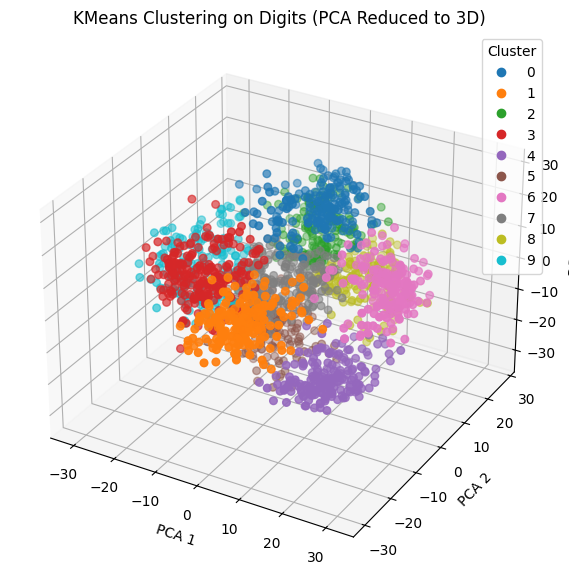

In [28]:
#Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D
#scatter
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Step 2: Reduce to 3 components using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Step 3: Apply KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Step 4: Visualize in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10', s=30)
ax.set_title("KMeans Clustering on Digits (PCA Reduced to 3D)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


In [29]:
#Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the
#clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=300, centers=5, random_state=0)
model = KMeans(n_clusters=5)
labels = model.fit_predict(X)

score = silhouette_score(X, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.5616042058923767


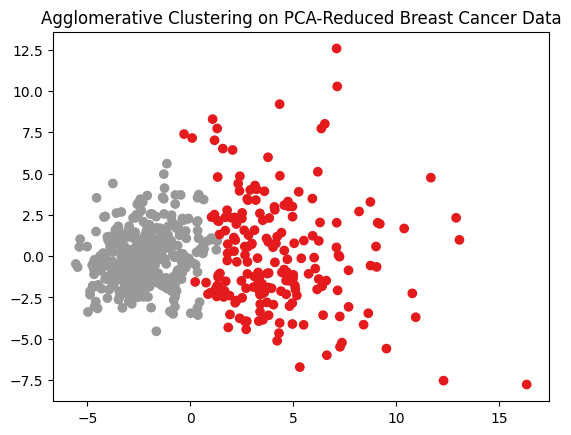

In [30]:
#Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.
#Visualize in 2D
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

data = load_breast_cancer()
X_scaled = StandardScaler().fit_transform(data.data)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

model = AgglomerativeClustering(n_clusters=2)
labels = model.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set1')
plt.title("Agglomerative Clustering on PCA-Reduced Breast Cancer Data")
plt.show()


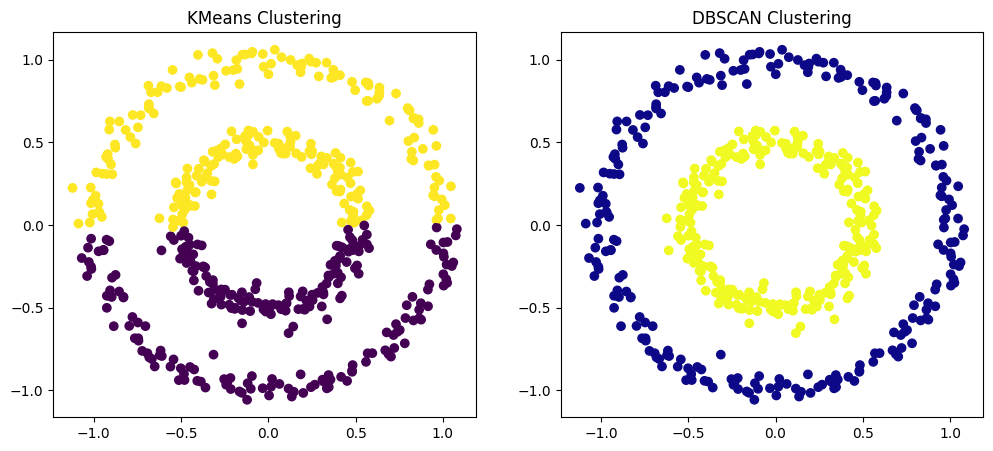

In [31]:
#Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
#side-by-side
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05)

kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.2, min_samples=5)

labels_kmeans = kmeans.fit_predict(X)
labels_dbscan = dbscan.fit_predict(X)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis')
ax[0].set_title("KMeans Clustering")

ax[1].scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='plasma')
ax[1].set_title("DBSCAN Clustering")

plt.show()


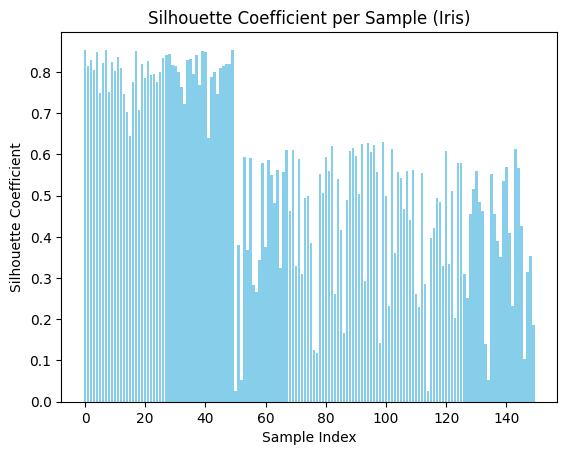

In [32]:
# Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_samples
import numpy as np

X = load_iris().data
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

silhouette_vals = silhouette_samples(X, labels)

plt.bar(range(len(X)), silhouette_vals, color='skyblue')
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient per Sample (Iris)")
plt.show()


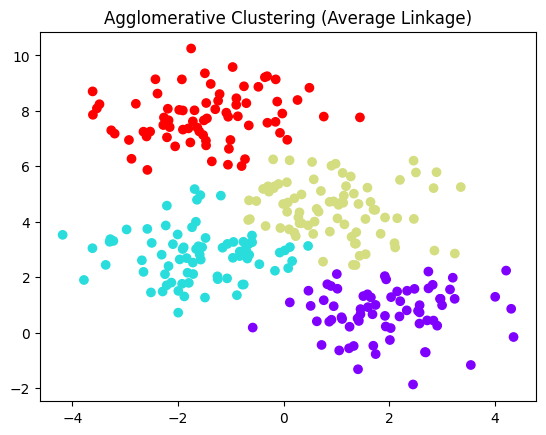

In [33]:
#Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
#Visualize clusters
from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(n_samples=300, centers=4, random_state=0)
model = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("Agglomerative Clustering (Average Linkage)")
plt.show()


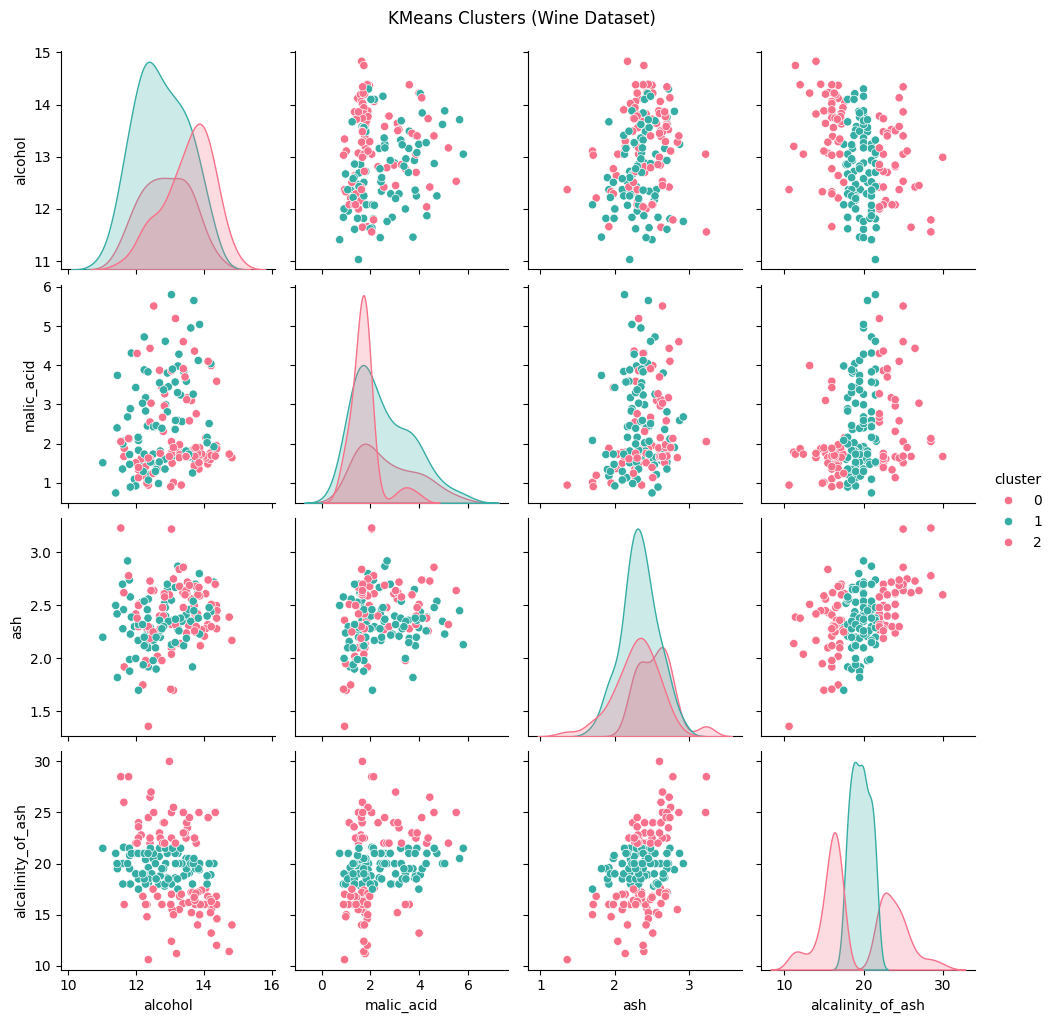

In [34]:
# Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4
#features)
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data.data[:, :4], columns=data.feature_names[:4])

model = KMeans(n_clusters=3)
labels = model.fit_predict(X)
X['cluster'] = labels

sns.pairplot(X, hue='cluster', palette='husl')
plt.suptitle("KMeans Clusters (Wine Dataset)", y=1.02)
plt.show()


In [35]:
#Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the
#count
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.2, random_state=0)
model = DBSCAN(eps=0.5, min_samples=5)
labels = model.fit_predict(X)

import numpy as np
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Clusters found:", n_clusters)
print("Noise points:", n_noise)



Clusters found: 2
Noise points: 66


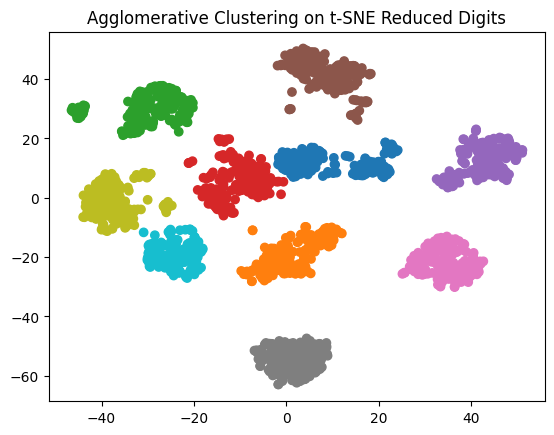

In [36]:
# Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the
#clusters
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

X, y = load_digits(return_X_y=True)
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

model = AgglomerativeClustering(n_clusters=10)
labels = model.fit_predict(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10')
plt.title("Agglomerative Clustering on t-SNE Reduced Digits")
plt.show()
